In [1]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('mortgage.csv')

In [3]:
df = df.dropna()

In [5]:
df['default'] = df['default_time']

In [44]:
df[df['default']==1]

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,payoff_time,status_time,default
23,1,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,...,1,0,45000.0,715,69.4,9.200,87.03,0,1,1
99,6,56,19,25,139,190474.11,75.834755,6.580,181.43,1.717053,...,1,0,212000.0,670,80.0,6.580,191.42,0,1,1
115,9,37,18,25,138,130140.31,99.138105,8.000,153.35,-4.146711,...,1,0,128000.0,501,80.0,8.000,186.91,0,1,1
120,10,29,18,25,139,88046.35,67.296390,10.230,217.37,1.692969,...,1,0,90000.0,665,80.0,7.200,186.91,0,1,1
146,16,34,18,25,138,160044.34,73.431289,9.875,173.35,-0.314448,...,1,0,164500.0,572,70.0,7.500,186.91,0,1,1
159,18,34,18,25,139,99718.91,100.485278,10.625,173.35,-0.314448,...,0,0,101650.0,571,95.0,10.030,186.91,0,1,1
163,19,28,19,25,139,187752.96,68.169815,10.310,219.67,1.229172,...,1,0,192000.0,630,80.0,7.300,191.42,0,1,1
175,22,29,18,25,139,165955.21,63.422200,11.255,217.37,1.692969,...,1,0,168750.0,582,75.0,8.300,186.91,0,1,1
184,24,32,19,25,139,35165.55,64.583809,7.000,186.12,1.104163,...,1,1,47600.0,615,85.0,9.710,191.42,0,1,1
188,25,28,19,25,139,53582.08,68.663702,9.950,219.67,1.229172,...,1,0,54400.0,557,80.0,7.000,191.42,0,1,1


In [45]:
df.shape

(622219, 23)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :22], df.iloc[:, 22], 
                                                    test_size = 0.2, random_state=42)

In [63]:
df.columns

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'payoff_time', 'status_time', 'default'],
      dtype='object')

In [26]:
train_df = X_train.copy()

In [27]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(train_df)

/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
lm1 = LogisticRegression(solver='liblinear')
lm1.fit(train_df[['FICO_orig_time']], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
lm1.score(train_df[['FICO_orig_time']], y_train)

0.9757962935061022

In [36]:
lm2 = LogisticRegression(solver='liblinear')
lm2.fit(train_df, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
lm2.score(train_df, y_train)

0.9756858018180905

No handles with labels found to put in legend.


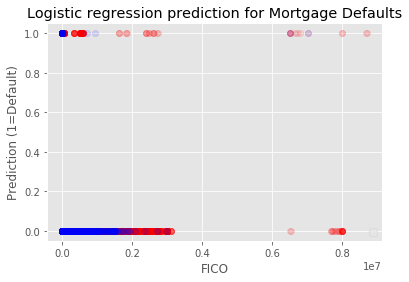

In [64]:
feature = train_df
prediction_soft = lm2.predict(feature)


plt.plot(feature[default_mask], prediction_hard[default_mask], 'ro', alpha=0.1)
plt.plot(feature[~default_mask], prediction_hard[~default_mask], 'bo', alpha=0.1)
plt.ylim(-0.05, 1.05)
plt.xlabel('FICO')
plt.ylabel('Prediction (1=Default)')
plt.title('Logistic regression prediction for Mortgage Defaults')
plt.legend(loc='lower right');

In [62]:
confusion_matrix(y_train, lm1.predict(train_df[['FICO_orig_time']]))

array([[485727,      0],
       [ 12048,      0]])

In [66]:
confusion_matrix(y_test, lm2.predict(feature))

ValueError: Found input variables with inconsistent numbers of samples: [124444, 497775]